In [1]:
# install libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300
sns.set_palette('RdYlGn')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# read file
df = pd.read_csv(r"C:\Users\Asif Sayyed\Documents\GitHub\MachineLearns\data\Mall_Customers.csv")
# format column names
df.columns = df.columns.str.lower().str.replace('(k$)','')\
                .str.replace('(1-100)','').str.strip().str.replace(' ','_')\
                .str.replace('genre','gender')
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


- There are total 200 rows of data 
- Average age is 39 years old with age ranging from 18 to 70, standard deviation of 13 years
- Average income is 60k with minumum being 15k and maximum being 137 for this dataset
- Spending score ranges from 1 to 100, but the max score we see here is 99 with the average of 50

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- There are no missing values
- The datatypes appear correct

In [5]:
gender_count

NameError: name 'gender_count' is not defined

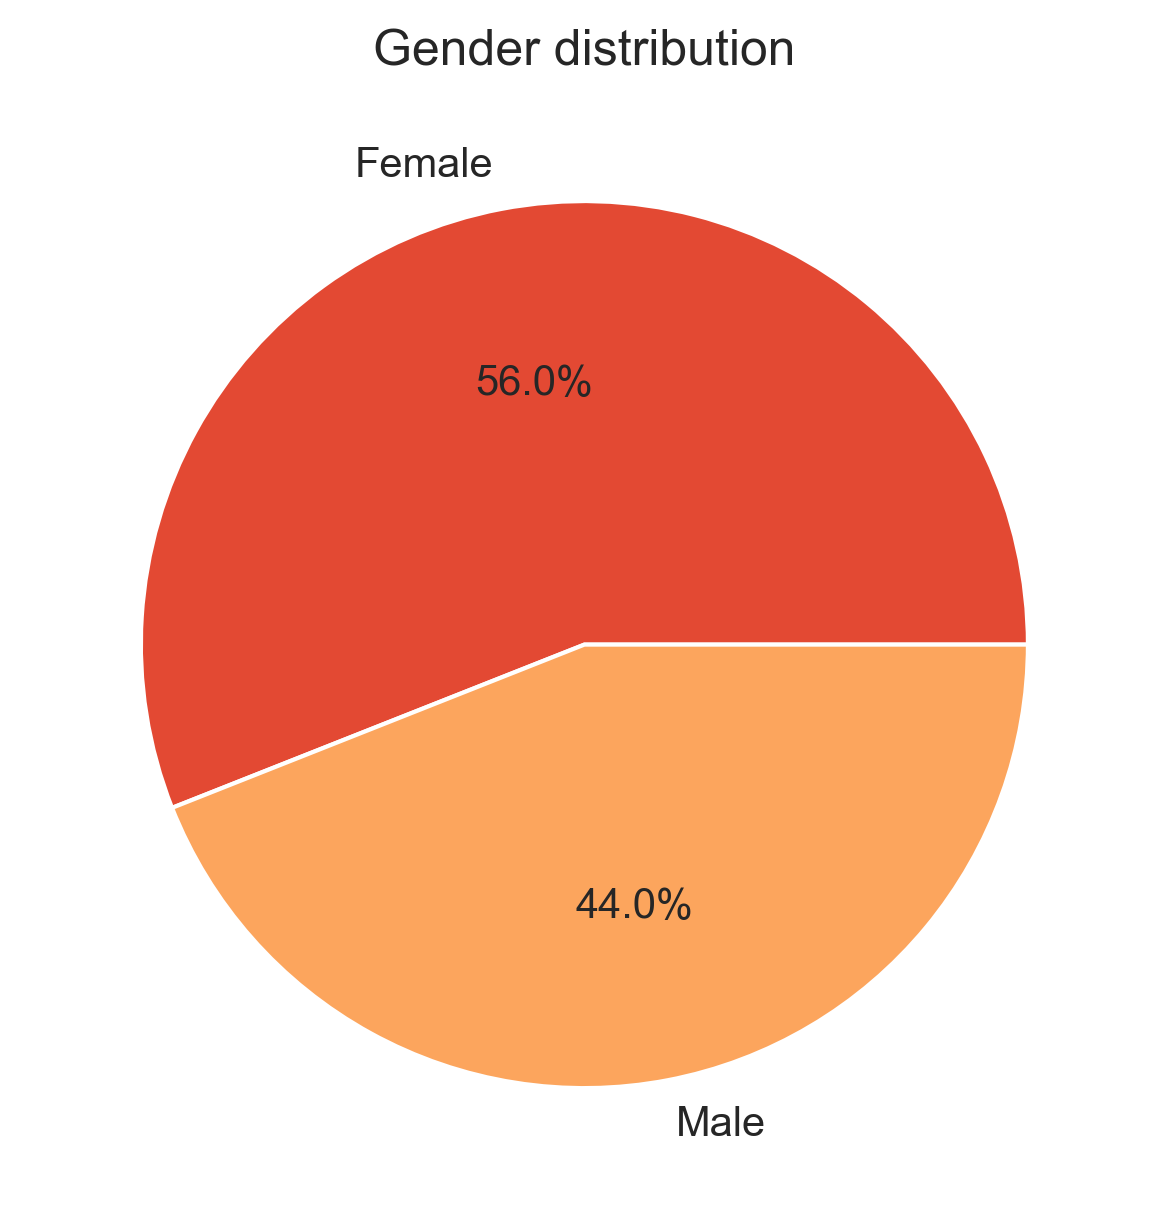

In [ ]:
# Visualise gender
gender_count = df.gender.value_counts()
plt.pie(gender_count, autopct='%1.1f%%',labels=gender_count.index)
plt.title('Gender distribution')
plt.show()

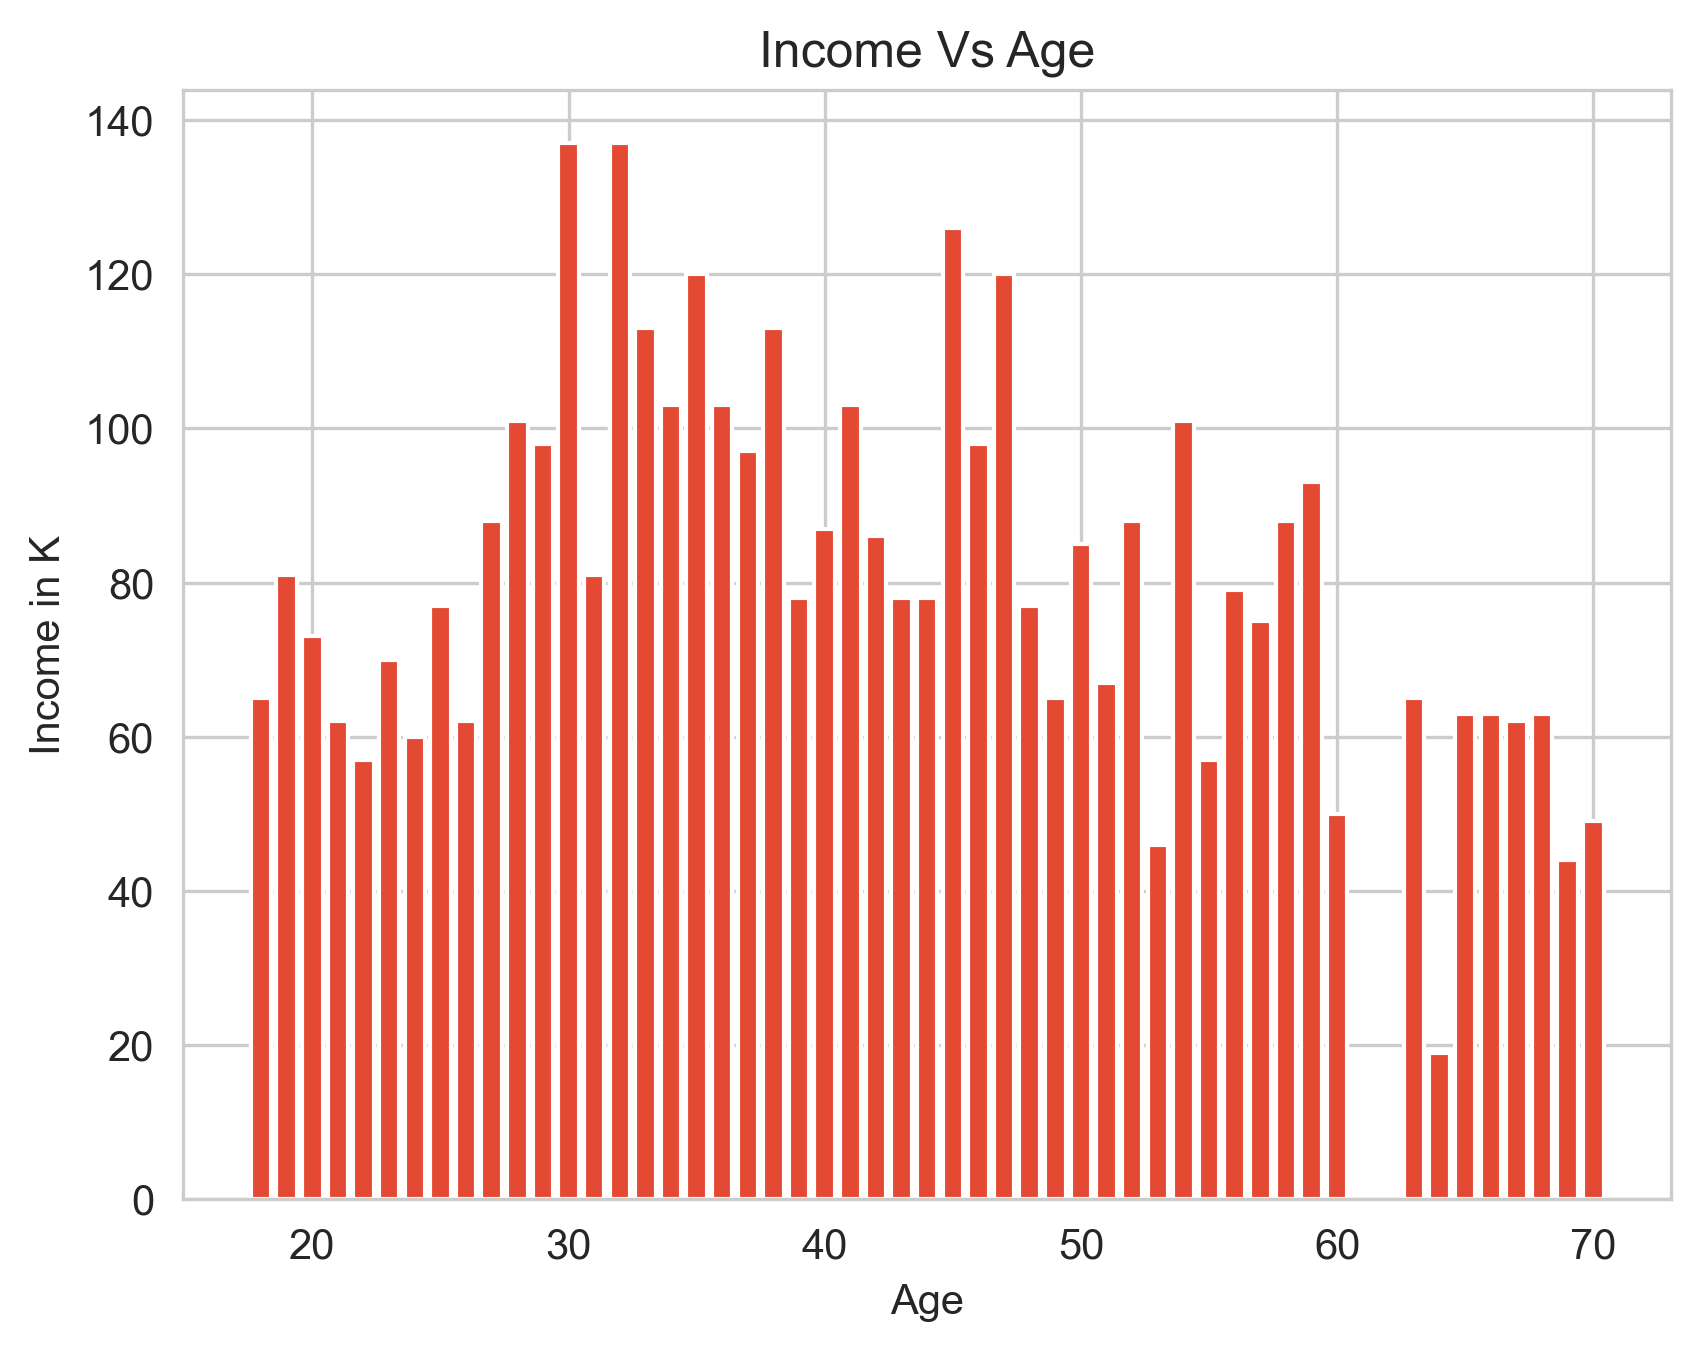

In [61]:
# income vs age barchart plot
plt.bar(df['age'],df['annual_income'])
plt.title('Income Vs Age')
plt.xlabel('Age')
plt.ylabel('Income in K')
plt.show()